In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
df_2017 = pd.read_csv('2017_Call_a_bike.csv')

In [3]:
df_2017.count()

date                         1615553
BOOKING_HAL_ID               1615553
CATEGORY_HAL_ID              1615553
VEHICLE_HAL_ID               1615553
CUSTOMER_HAL_ID              1615553
DATE_BOOKING                 1615553
DATE_FROM                    1615553
DATE_UNTIL                   1615553
COMPUTE_EXTRA_BOOKING_FEE    1615553
TRAVERSE_USE                 1615553
DISTANCE                     1615048
START_RENTAL_ZONE            1357499
START_RENTAL_ZONE_HAL_ID     1505908
END_RENTAL_ZONE              1353296
END_RENTAL_ZONE_HAL_ID       1504272
RENTAL_ZONE_HAL_SRC          1568548
CITY_RENTAL_ZONE             1615553
TECHNICAL_INCOME_CHANNEL     1596837
dtype: int64

In [4]:
df_2017.head()

,date,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2017-01-01 00:08:02,43562062,51000,118959,3F9F83CC6BB832E78FBF5AFCDA3F06711A47EDD5,2017-01-01 00:08:02,2017-01-01 00:08:02,2017-01-01 00:12:13,Nein,Nein,0.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Amsinckstraße/ Nordkanalbrücke,218174.0,Standort,Hamburg,Terminal HH_34 (-2541-)
1,2017-01-01 00:22:58,43562098,51000,119276,3390E88D3CA6B366BB99B7CD07011D45DDFD4BCC,2017-01-01 00:22:58,2017-01-01 00:22:58,2017-01-01 00:42:59,Nein,Nein,0.0,Millerntorplatz/St.Pauli,131905.0,Kümmellstraße / Robert-Koch-Straße,140794.0,Standort,Hamburg,iPhone SRH
2,2017-01-01 01:14:31,43562311,51000,110849,9D055BA1B76A83B7DDE23F1F047417B898DE8EEB,2017-01-01 01:14:31,2017-01-01 01:14:31,2017-01-01 01:19:21,Nein,Nein,0.0,Winterhuder Weg/ Zimmerstraße,208292.0,Mundsburg / Schürbeker Straße,140799.0,Standort,Hamburg,iPhone SRH
3,2017-01-01 00:58:23,43562276,51000,143816,E5EA473376AC6D935858189469A53C01C736C870,2017-01-01 00:58:23,2017-01-01 00:58:23,2017-01-01 01:13:05,Nein,Nein,0.0,Sternschanze / Eingang Dänenweg,139501.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Standort,Hamburg,Terminal HH_6 (-2133-)
4,2017-01-01 01:31:30,43562334,50000,164404,90DB1A8F6F3EF270F4671D1770D93211D34E8EA6,2017-01-01 01:31:30,2017-01-01 01:31:30,2017-01-01 01:57:58,Nein,Nein,0.0,Eschersheimer Landstraße / Am Lindenbaum,227482.0,Marbachweg / Eckenheimer Landstraße,231798.0,Standort,Frankfurt am Main,IVR


In [5]:
df_2017.drop(['COMPUTE_EXTRA_BOOKING_FEE', 'TRAVERSE_USE', 'DISTANCE', 'BOOKING_HAL_ID', 'CUSTOMER_HAL_ID'], axis=1, inplace=True)

In [6]:
CITY = df_2017.CITY_RENTAL_ZONE.unique()

In [7]:
category = df_2017.CATEGORY_HAL_ID.unique()

In [8]:
df_2017.head()

,date,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,2017-01-01 00:08:02,51000,118959,2017-01-01 00:08:02,2017-01-01 00:08:02,2017-01-01 00:12:13,Hauptbahnhof Ost / Hachmannplatz,131873.0,Amsinckstraße/ Nordkanalbrücke,218174.0,Standort,Hamburg,Terminal HH_34 (-2541-)
1,2017-01-01 00:22:58,51000,119276,2017-01-01 00:22:58,2017-01-01 00:22:58,2017-01-01 00:42:59,Millerntorplatz/St.Pauli,131905.0,Kümmellstraße / Robert-Koch-Straße,140794.0,Standort,Hamburg,iPhone SRH
2,2017-01-01 01:14:31,51000,110849,2017-01-01 01:14:31,2017-01-01 01:14:31,2017-01-01 01:19:21,Winterhuder Weg/ Zimmerstraße,208292.0,Mundsburg / Schürbeker Straße,140799.0,Standort,Hamburg,iPhone SRH
3,2017-01-01 00:58:23,51000,143816,2017-01-01 00:58:23,2017-01-01 00:58:23,2017-01-01 01:13:05,Sternschanze / Eingang Dänenweg,139501.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Standort,Hamburg,Terminal HH_6 (-2133-)
4,2017-01-01 01:31:30,50000,164404,2017-01-01 01:31:30,2017-01-01 01:31:30,2017-01-01 01:57:58,Eschersheimer Landstraße / Am Lindenbaum,227482.0,Marbachweg / Eckenheimer Landstraße,231798.0,Standort,Frankfurt am Main,IVR


In [9]:
print(len(CITY))
print(len(category))

47
5


In [10]:
city_dict = {}
cities, city_count = [],[]
for city in CITY:
    city_dict[city] = len(df_2017[df_2017['CITY_RENTAL_ZONE']==city])
    cities.append(city)
    city_count.append(city_dict[city])

In [11]:
print(city_dict)

{'Hamburg': 930667, 'Frankfurt am Main': 276917, 'Kassel': 42698, 'München': 83117, 'Marburg': 54544, 'Stuttgart': 44788, 'Köln': 61583, 'Darmstadt': 104197, 'Wiesbaden': 4965, 'Rüsselsheim': 8308, 'Flugh. Frankfurt': 933, 'Baden-Baden': 221, 'Heidelberg': 79, 'Kiel': 400, 'Halle': 424, 'Hannover': 114, 'Göttingen': 155, 'Hanau': 57, 'Bremen': 95, 'Lübeck': 58, 'Bonn': 84, 'Mannheim': 109, 'Bielefeld': 7, 'Düsseldorf': 150, 'Freiburg': 124, 'Fulda': 19, 'Ingolstadt': 65, 'Mainz': 98, 'Troisdorf': 21, 'Erlangen': 18, 'Saarbrücken': 18, 'Karlsruhe': 105, 'Berlin': 176, 'Magdeburg': 35, 'Braunschweig': 24, 'Rostock': 25, 'Würzburg': 38, 'Oldenburg (Oldb)': 10, 'Gütersloh': 6, 'Bamberg': 25, 'Weimar': 28, 'Warnemünde': 17, 'Kaiserslautern': 7, 'Aschaffenburg': 11, 'Oberhausen': 8, 'Hennef': 3, 'Rendsburg': 2}


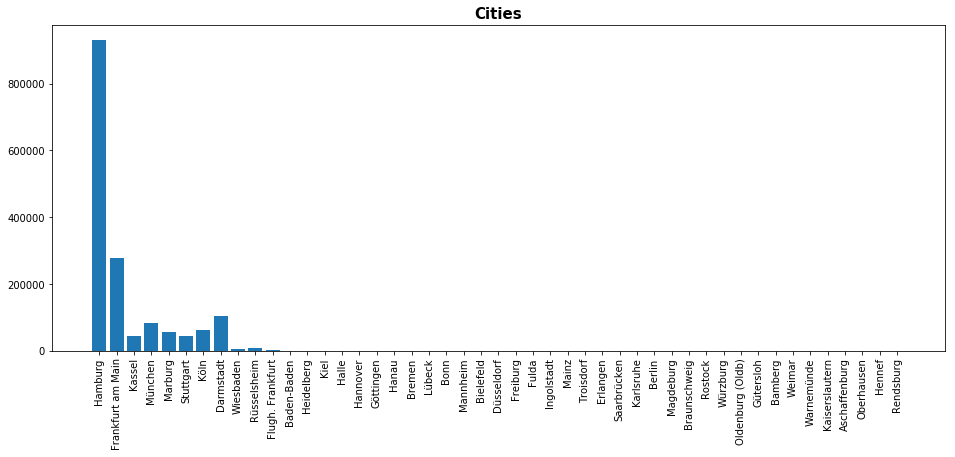

In [12]:
x_plot = np.arange(len(cities))
plt.figure(figsize=(16,6))
plt.title('Cities', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, city_count)
plt.xticks(x_plot+1, cities, rotation = 'vertical')
plt.show()

In [13]:
category_dict = {}
categories, category_count = [],[]
for c in category:
    category_dict[c] = len(df_2017[df_2017['CATEGORY_HAL_ID']==c])
    categories.append(c)
    category_count.append(category_dict[c])

In [14]:
print(category_dict)

{51000: 930667, 50000: 636731, 53000: 42698, 50001: 5448, 50400: 9}


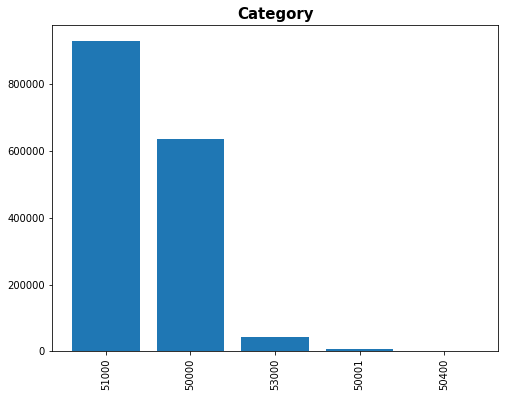

In [15]:
x_plot = np.arange(len(categories))
plt.figure(figsize=(8,6))
plt.title('Category', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, category_count)
plt.xticks(x_plot+1, categories, rotation = 'vertical')
plt.show()

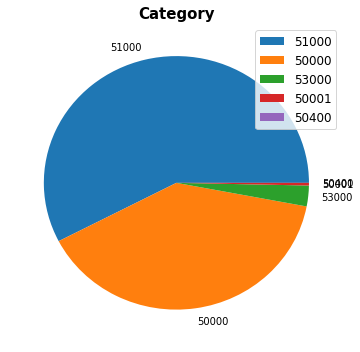

In [16]:
colors = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD","#0098D4"]
plt.figure(figsize=(5,5))
plt.title('Category', fontsize=15, fontweight='bold')
plt.pie(category_count, labels=categories)
plt.legend(categories, fontsize = 'large', loc = "best")
plt.tight_layout()
plt.show()

In [17]:
del df_2017['date']
df_2017.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,51000,118959,2017-01-01 00:08:02,2017-01-01 00:08:02,2017-01-01 00:12:13,Hauptbahnhof Ost / Hachmannplatz,131873.0,Amsinckstraße/ Nordkanalbrücke,218174.0,Standort,Hamburg,Terminal HH_34 (-2541-)
1,51000,119276,2017-01-01 00:22:58,2017-01-01 00:22:58,2017-01-01 00:42:59,Millerntorplatz/St.Pauli,131905.0,Kümmellstraße / Robert-Koch-Straße,140794.0,Standort,Hamburg,iPhone SRH
2,51000,110849,2017-01-01 01:14:31,2017-01-01 01:14:31,2017-01-01 01:19:21,Winterhuder Weg/ Zimmerstraße,208292.0,Mundsburg / Schürbeker Straße,140799.0,Standort,Hamburg,iPhone SRH
3,51000,143816,2017-01-01 00:58:23,2017-01-01 00:58:23,2017-01-01 01:13:05,Sternschanze / Eingang Dänenweg,139501.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Standort,Hamburg,Terminal HH_6 (-2133-)
4,50000,164404,2017-01-01 01:31:30,2017-01-01 01:31:30,2017-01-01 01:57:58,Eschersheimer Landstraße / Am Lindenbaum,227482.0,Marbachweg / Eckenheimer Landstraße,231798.0,Standort,Frankfurt am Main,IVR


In [18]:
df_2017['DATE_BOOKING'] = pd.to_datetime(df_2017['DATE_BOOKING'])

In [19]:
df_2017.index = df_2017['DATE_BOOKING']
df_2017.head()

,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
DATE_BOOKING,,,,,,,,,,,,
2017-01-01 00:08:02,51000,118959,2017-01-01 00:08:02,2017-01-01 00:08:02,2017-01-01 00:12:13,Hauptbahnhof Ost / Hachmannplatz,131873.0,Amsinckstraße/ Nordkanalbrücke,218174.0,Standort,Hamburg,Terminal HH_34 (-2541-)
2017-01-01 00:22:58,51000,119276,2017-01-01 00:22:58,2017-01-01 00:22:58,2017-01-01 00:42:59,Millerntorplatz/St.Pauli,131905.0,Kümmellstraße / Robert-Koch-Straße,140794.0,Standort,Hamburg,iPhone SRH
2017-01-01 01:14:31,51000,110849,2017-01-01 01:14:31,2017-01-01 01:14:31,2017-01-01 01:19:21,Winterhuder Weg/ Zimmerstraße,208292.0,Mundsburg / Schürbeker Straße,140799.0,Standort,Hamburg,iPhone SRH
2017-01-01 00:58:23,51000,143816,2017-01-01 00:58:23,2017-01-01 00:58:23,2017-01-01 01:13:05,Sternschanze / Eingang Dänenweg,139501.0,Bahnhof Altona Ost/Max-Brauer-Allee,131646.0,Standort,Hamburg,Terminal HH_6 (-2133-)
2017-01-01 01:31:30,50000,164404,2017-01-01 01:31:30,2017-01-01 01:31:30,2017-01-01 01:57:58,Eschersheimer Landstraße / Am Lindenbaum,227482.0,Marbachweg / Eckenheimer Landstraße,231798.0,Standort,Frankfurt am Main,IVR


In [20]:
df_month = df_2017.groupby(pd.TimeGrouper(freq='M'))

In [21]:
tem = df_month['DATE_BOOKING'].count()

In [22]:
month_name=[]
month_wise_booking=[]
for p,l in tem.items():
    month_name.append(calendar.month_abbr[p.month])
    month_wise_booking.append(l)

In [23]:
print(month_name)
print(month_wise_booking)

['Jan', 'Feb', 'Mar', 'Apr', 'May']
[252056, 257098, 409249, 437352, 259798]


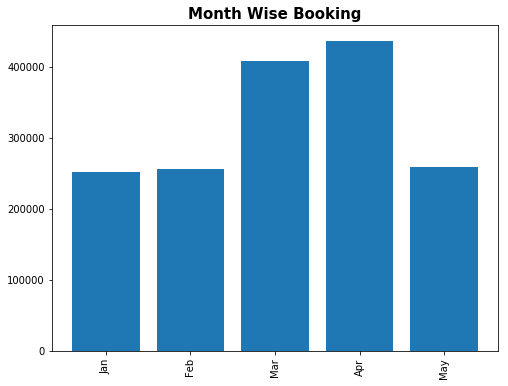

In [24]:
x_plot = np.arange(len(month_name))
plt.figure(figsize=(8,6))
plt.title('Month Wise Booking', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, month_wise_booking)
plt.xticks(x_plot+1, month_name, rotation = 'vertical')
plt.show()

In [25]:
df_2017.count()

CATEGORY_HAL_ID             1615553
VEHICLE_HAL_ID              1615553
DATE_BOOKING                1615553
DATE_FROM                   1615553
DATE_UNTIL                  1615553
START_RENTAL_ZONE           1357499
START_RENTAL_ZONE_HAL_ID    1505908
END_RENTAL_ZONE             1353296
END_RENTAL_ZONE_HAL_ID      1504272
RENTAL_ZONE_HAL_SRC         1568548
CITY_RENTAL_ZONE            1615553
TECHNICAL_INCOME_CHANNEL    1596837
dtype: int64

In [26]:
df = df_2017.dropna(subset = ['TECHNICAL_INCOME_CHANNEL'],how='any', axis=0)

In [27]:
df.count()

CATEGORY_HAL_ID             1596837
VEHICLE_HAL_ID              1596837
DATE_BOOKING                1596837
DATE_FROM                   1596837
DATE_UNTIL                  1596837
START_RENTAL_ZONE           1341603
START_RENTAL_ZONE_HAL_ID    1488263
END_RENTAL_ZONE             1337571
END_RENTAL_ZONE_HAL_ID      1486621
RENTAL_ZONE_HAL_SRC         1550340
CITY_RENTAL_ZONE            1596837
TECHNICAL_INCOME_CHANNEL    1596837
dtype: int64

In [28]:
channel = df['TECHNICAL_INCOME_CHANNEL']

In [29]:
channel_group = {'android':[], 'iphone': [], 'windows': [], 'other': []}
for j in channel:
    if ('Android' in j):
        channel_group['android'].append(j)
    elif ('iPhone' in j):
        channel_group['iphone'].append(j)
    elif ('Windows' in j):
        channel_group['windows'].append(j)
    else:
        channel_group['other'].append(j)

In [30]:
groups, group_count = [],[]
for i in channel_group:
    groups.append(i)
    group_count.append(len(channel_group[i]))
print(groups)
print(group_count)

['android', 'iphone', 'windows', 'other']
[506251, 602349, 16444, 471793]


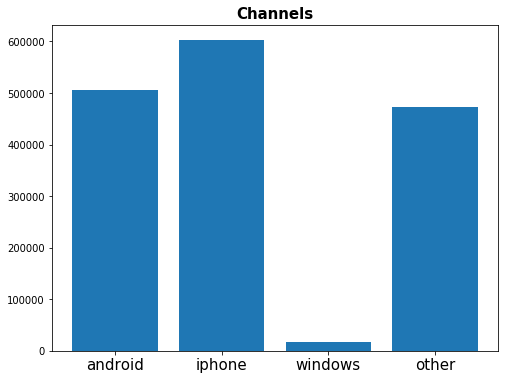

In [31]:
x_plot = np.arange(len(groups))
plt.figure(figsize=(8,6))
plt.title('Channels', fontsize=15, fontweight='bold')
p = plt.bar(x_plot+1, group_count)
plt.xticks(x_plot+1, groups, fontsize=15)
plt.show()